In [382]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
import warnings

warnings.filterwarnings('ignore')

# Load the data from the file credit_card_default.csv
df = pd.read_csv('credit_card_default.csv')
# Review the data
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<h1 style='color:skyblue'><strong>Data Cleaning</strong></h1>

In [383]:
# Check for missing values
na_values = df.isna().sum()
na_values

ID           0
LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [384]:
# Review the data types
df.dtypes

ID           int64
LIMIT_BAL    int64
GENDER       int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [385]:
# Drop 'ID' column
df = df.drop(columns=['ID'])

In [386]:
# Convert 'GENDER' to 0 and 1, instead of 1 and 2
# 0 = Female
# 1 = Male
df['GENDER'] = df['GENDER'].replace(2, 0)
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [387]:
# Check for unique values in each column to identify areas for cleaning
# Education & Marriage columns have values that are not documented
unique_counts = df.nunique()
unique_counts

LIMIT_BAL       81
GENDER           2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

In [388]:
# Check for the invalid values in the 'EDUCATION' column
# 0 and 6 are not valid categories
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [389]:
# Drop the rows with invalid values in the 'EDUCATION' column
df = df[~df['EDUCATION'].isin([0, 6])]
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [390]:
# Repeat for the 'MARRIAGE' column
df['MARRIAGE'].value_counts()

MARRIAGE
2    15933
1    13627
3      321
0       54
Name: count, dtype: int64

In [391]:
# Replace the invalid value of 0 with 3, which is documented as 'Other'
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [392]:
# Check for invalid values in the 'PAY_1' column
df['PAY_1'].value_counts()

PAY_1
 0    14700
-1     5675
 1     3685
-2     2750
 2     2662
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [393]:
# Update -1 and -2 values in PAY_1 to 0
df['PAY_1'] = df['PAY_1'].replace(-2,0)
df['PAY_1'] = df['PAY_1'].replace(-1,0)

In [394]:
# Loop through the other PAY_# fields to do the same
for i in range(2,7):
    df['PAY_{}'.format(i)] = df['PAY_{}'.format(i)].replace(-2,0)
    df['PAY_{}'.format(i)] = df['PAY_{}'.format(i)].replace(-1,0)

In [395]:
# Set 'DEFAULT' to categorical variable
df['DEFAULT'] = df['DEFAULT'].astype('bool')

In [396]:
# split the data into training and testing sets
X = df.drop(['DEFAULT'], axis=1)
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['EDUCATION','MARRIAGE','GENDER'], drop_first=True, dtype=float)

y = df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23948 entries, 16983 to 23701
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    23948 non-null  int64  
 1   AGE          23948 non-null  int64  
 2   PAY_1        23948 non-null  int64  
 3   PAY_2        23948 non-null  int64  
 4   PAY_3        23948 non-null  int64  
 5   PAY_4        23948 non-null  int64  
 6   PAY_5        23948 non-null  int64  
 7   PAY_6        23948 non-null  int64  
 8   BILL_AMT1    23948 non-null  int64  
 9   BILL_AMT2    23948 non-null  int64  
 10  BILL_AMT3    23948 non-null  int64  
 11  BILL_AMT4    23948 non-null  int64  
 12  BILL_AMT5    23948 non-null  int64  
 13  BILL_AMT6    23948 non-null  int64  
 14  PAY_AMT1     23948 non-null  int64  
 15  PAY_AMT2     23948 non-null  int64  
 16  PAY_AMT3     23948 non-null  int64  
 17  PAY_AMT4     23948 non-null  int64  
 18  PAY_AMT5     23948 non-null  int64  
 19  PAY_A

<h1 style='color:skyblue'><strong>Modeling</strong></h1>

<h3 style='color:Aquamarine'><strong>Model 1 - Full Log Reg</strong></h3>

In [397]:
#Fit full logistic regression model to examine the significance of the terms
X = sm.add_constant(X)

logit_full = sm.Logit(y_train, X_train).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.451239
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                23948
Model:                          Logit   Df Residuals:                    23921
Method:                           MLE   Df Model:                           26
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1466
Time:                        22:35:28   Log-Likelihood:                -10806.
converged:                       True   LL-Null:                       -12663.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
LIMIT_BAL   -2.122e-06   1.73e-07    -12.266      0.000   -2.46e-06   -1.78e-06
AGE            -0.0254    

In [398]:
X_train

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3,GENDER_1
16983,50000,22,0,0,0,0,0,0,18108,18512,...,619,700,1000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8756,140000,28,0,0,0,0,2,2,123662,124785,...,5500,5300,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7076,60000,42,0,0,0,0,0,0,61759,60399,...,1614,1590,2000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29152,120000,61,1,2,0,0,0,0,121709,78369,...,3000,2600,2200,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9111,480000,39,0,0,0,0,0,0,428927,436425,...,12000,12500,12200,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29867,340000,29,0,0,0,0,0,0,44855,331641,...,13005,10011,12005,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5399,140000,25,0,0,0,0,0,0,2229,15985,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
862,30000,52,2,2,7,7,7,7,2450,2450,...,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15824,80000,27,1,2,2,2,2,0,4073,3863,...,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [399]:
X_test

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3,GENDER_1
19268,300000,42,0,0,0,0,0,0,885,0,...,494,0,138,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12602,70000,23,0,0,0,0,0,0,54428,25085,...,539,2000,1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16704,50000,42,2,0,0,0,0,2,4864,5876,...,1057,0,306,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1141,30000,25,0,0,2,0,0,2,19801,20449,...,1500,0,323,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12851,200000,40,0,0,0,0,0,2,16816,17852,...,5800,0,3000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,110000,25,2,0,0,0,0,0,38449,38433,...,600,1000,5000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
17029,50000,24,0,0,0,0,0,0,50649,50607,...,1043,1085,1193,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28231,30000,42,1,2,2,2,0,0,30445,27794,...,1100,1100,1127,0.0,1.0,0.0,0.0,1.0,0.0,0.0
24420,500000,38,0,0,0,0,0,0,6178,825,...,17,24875,839,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [400]:
# Generate predicted values for training set
pprob = logit_full.predict(X_train)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set
X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 23948 entries, 16983 to 23701
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    23948 non-null  int64  
 1   AGE          23948 non-null  int64  
 2   PAY_1        23948 non-null  int64  
 3   PAY_2        23948 non-null  int64  
 4   PAY_3        23948 non-null  int64  
 5   PAY_4        23948 non-null  int64  
 6   PAY_5        23948 non-null  int64  
 7   PAY_6        23948 non-null  int64  
 8   BILL_AMT1    23948 non-null  int64  
 9   BILL_AMT2    23948 non-null  int64  
 10  BILL_AMT3    23948 non-null  int64  
 11  BILL_AMT4    23948 non-null  int64  
 12  BILL_AMT5    23948 non-null  int64  
 13  BILL_AMT6    23948 non-null  int64  
 14  PAY_AMT1     23948 non-null  int64  
 15  PAY_AMT2     23948 non-null  int64  
 16  PAY_AMT3     23948 non-null  int64  
 17  PAY_AMT4     23948 non-null  int64  
 18  PAY_AMT5     23948 non-null  int64  
 19  PAY_A

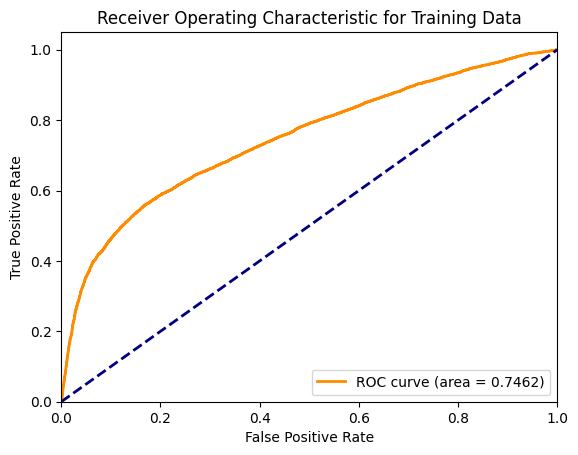

In [401]:
# Generate ROC curve for training data
y_train = y_train.astype('category')
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc_train = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


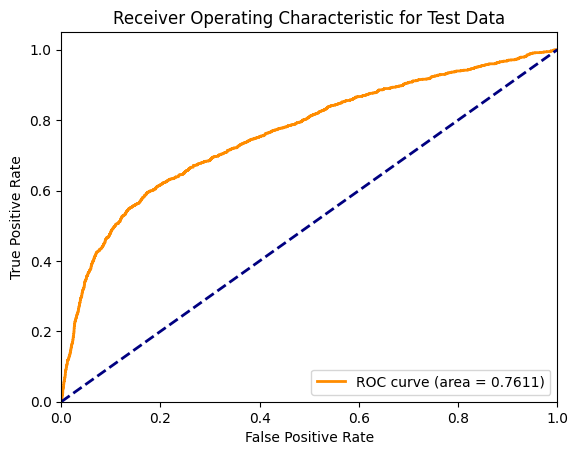

In [402]:
# Generate ROC curve for test data
y_test = y_test.astype('category')
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc_test = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


In [403]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("ROC AUC (Train) : {:.4f}".format(roc_auc_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("ROC AUC (Test) : {:.4f}".format(roc_auc_test))
print("")

Accuracy (Train) : 0.8172
Precision (Train): 0.6818
Recall (Train)  : 0.3277
ROC AUC (Train) : 0.7462

Accuracy (Test) : 0.8151
Precision (Test): 0.6677
Recall (Test)  : 0.3263
ROC AUC (Test) : 0.7611



<h3 style='color:Aquamarine'><strong>Model 2 - Stepwise</strong></h3>

In [404]:
Xstep = df.drop(['DEFAULT'], axis=1)
ystep = df['DEFAULT']

In [405]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.Logit
    
    Arguments:
    X -- pandas.DataFrame with candidate features
    y -- list-like with the target
    initial_list -- list of features to start with (column names of X)
    threshold_in -- include a feature if its p-value < threshold_in
    threshold_out -- exclude a feature if its p-value > threshold_out
    verbose -- whether to print the sequence of inclusions and exclusions
    
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Example usage:
selected_features = stepwise_selection(Xstep, ystep)
print('Selected features:', selected_features)

Add  PAY_4                          with p-value 0.0
Add  PAY_1                          with p-value 0.0
Add  LIMIT_BAL                      with p-value 5.44902e-44
Add  PAY_6                          with p-value 3.39648e-20
Add  PAY_AMT1                       with p-value 2.40226e-10
Add  PAY_3                          with p-value 9.57566e-11
Add  MARRIAGE                       with p-value 3.09688e-09
Add  PAY_AMT2                       with p-value 3.59235e-06
Add  GENDER                         with p-value 8.40423e-06
Add  BILL_AMT3                      with p-value 0.00134092
Add  EDUCATION                      with p-value 0.00104041
Add  AGE                            with p-value 0.00204565
Add  PAY_AMT4                       with p-value 0.00461721
Add  PAY_5                          with p-value 0.00851482
Selected features: ['PAY_4', 'PAY_1', 'LIMIT_BAL', 'PAY_6', 'PAY_AMT1', 'PAY_3', 'MARRIAGE', 'PAY_AMT2', 'GENDER', 'BILL_AMT3', 'EDUCATION', 'AGE', 'PAY_AMT4', 'PAY_5'

In [406]:
# split the data into training and testing sets
X2 = df.drop(['DEFAULT'], axis=1)
X2=df[['PAY_4', 'PAY_1', 'LIMIT_BAL', 'PAY_6', 'PAY_AMT1', 'PAY_3', 'MARRIAGE', 'PAY_AMT2', 'GENDER', 'BILL_AMT3', 'EDUCATION', 'AGE', 'PAY_AMT4', 'PAY_5']]
X2 = pd.get_dummies(X2, columns=['MARRIAGE','EDUCATION','GENDER'], drop_first=True, dtype=float)

y2 = df['DEFAULT']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23948 entries, 16983 to 23701
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PAY_4        23948 non-null  int64  
 1   PAY_1        23948 non-null  int64  
 2   LIMIT_BAL    23948 non-null  int64  
 3   PAY_6        23948 non-null  int64  
 4   PAY_AMT1     23948 non-null  int64  
 5   PAY_3        23948 non-null  int64  
 6   PAY_AMT2     23948 non-null  int64  
 7   BILL_AMT3    23948 non-null  int64  
 8   AGE          23948 non-null  int64  
 9   PAY_AMT4     23948 non-null  int64  
 10  PAY_5        23948 non-null  int64  
 11  MARRIAGE_2   23948 non-null  float64
 12  MARRIAGE_3   23948 non-null  float64
 13  EDUCATION_2  23948 non-null  float64
 14  EDUCATION_3  23948 non-null  float64
 15  EDUCATION_4  23948 non-null  float64
 16  EDUCATION_5  23948 non-null  float64
 17  GENDER_1     23948 non-null  float64
dtypes: float64(7), int64(11)
memory usage: 3.5 MB
<

In [407]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.445921
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                23948
Model:                          Logit   Df Residuals:                    23929
Method:                           MLE   Df Model:                           18
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1567
Time:                        22:35:41   Log-Likelihood:                -10679.
converged:                       True   LL-Null:                       -12663.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5941      0.096    -16.628      0.000      -1.782      -1.406
PAY_4           0.0848    

In [408]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 23948 entries, 16983 to 23701
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PAY_4        23948 non-null  int64  
 1   PAY_1        23948 non-null  int64  
 2   LIMIT_BAL    23948 non-null  int64  
 3   PAY_6        23948 non-null  int64  
 4   PAY_AMT1     23948 non-null  int64  
 5   PAY_3        23948 non-null  int64  
 6   PAY_AMT2     23948 non-null  int64  
 7   BILL_AMT3    23948 non-null  int64  
 8   AGE          23948 non-null  int64  
 9   PAY_AMT4     23948 non-null  int64  
 10  PAY_5        23948 non-null  int64  
 11  MARRIAGE_2   23948 non-null  float64
 12  MARRIAGE_3   23948 non-null  float64
 13  EDUCATION_2  23948 non-null  float64
 14  EDUCATION_3  23948 non-null  float64
 15  EDUCATION_4  23948 non-null  float64
 16  EDUCATION_5  23948 non-null  float64
 17  GENDER_1     23948 non-null  float64
 18  p_success    23948 non-null  int64  
 19  p_pro

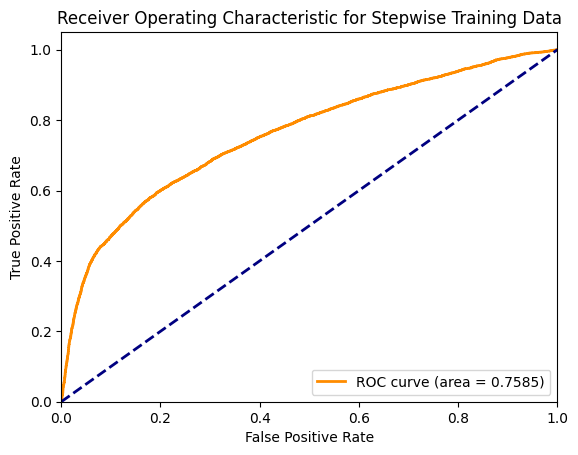

In [409]:
# Generate ROC curve for training data
y2_train = y2_train.astype('category')
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

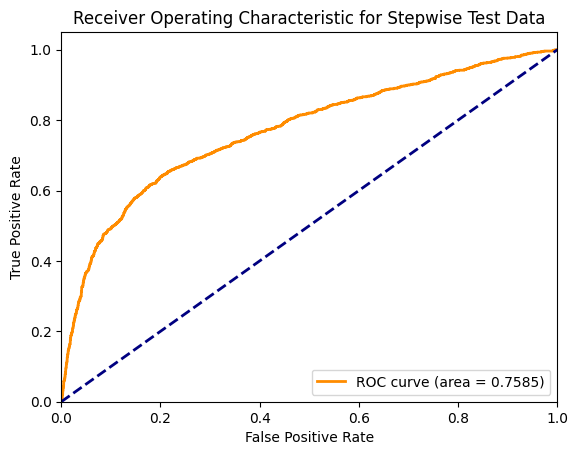

In [410]:
# Generate ROC curve for test data
y2_test = y2_test.astype('category')
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc_test = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()


In [411]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.8189
Precision (Train): 0.6872
Recall (Train)  : 0.3350

Accuracy (Test) : 0.8194
Precision (Test): 0.6844
Recall (Test)  : 0.3406



<h2 style='color:Aquamarine'><strong>Model 3 - SKLearn L1, L2, and Elastic Net</strong></h2>

In [412]:
# split the data into training and testing sets
X3 = df.drop(['DEFAULT'], axis=1)
X3 = pd.get_dummies(X3, columns=['EDUCATION','MARRIAGE','GENDER'], drop_first=True, dtype=float)

y3 = df['DEFAULT']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20954 entries, 964 to 23701
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    20954 non-null  int64  
 1   AGE          20954 non-null  int64  
 2   PAY_1        20954 non-null  int64  
 3   PAY_2        20954 non-null  int64  
 4   PAY_3        20954 non-null  int64  
 5   PAY_4        20954 non-null  int64  
 6   PAY_5        20954 non-null  int64  
 7   PAY_6        20954 non-null  int64  
 8   BILL_AMT1    20954 non-null  int64  
 9   BILL_AMT2    20954 non-null  int64  
 10  BILL_AMT3    20954 non-null  int64  
 11  BILL_AMT4    20954 non-null  int64  
 12  BILL_AMT5    20954 non-null  int64  
 13  BILL_AMT6    20954 non-null  int64  
 14  PAY_AMT1     20954 non-null  int64  
 15  PAY_AMT2     20954 non-null  int64  
 16  PAY_AMT3     20954 non-null  int64  
 17  PAY_AMT4     20954 non-null  int64  
 18  PAY_AMT5     20954 non-null  int64  
 19  PAY_AMT

In [467]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.2, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)

LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')

In [468]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

        feature  coefficient  abs_coefficient
2         PAY_1       0.8870           0.8870
23  EDUCATION_5      -0.6123           0.6123
24   MARRIAGE_2      -0.1538           0.1538
7         PAY_6       0.1424           0.1424
26     GENDER_1       0.1307           0.1307
4         PAY_3       0.1306           0.1306
6         PAY_5       0.0876           0.0876
5         PAY_4       0.0722           0.0722
21  EDUCATION_3      -0.0415           0.0415
3         PAY_2       0.0347           0.0347
1           AGE       0.0025           0.0025
10    BILL_AMT3       0.0000           0.0000
9     BILL_AMT2       0.0000           0.0000
8     BILL_AMT1      -0.0000           0.0000
0     LIMIT_BAL      -0.0000           0.0000
11    BILL_AMT4      -0.0000           0.0000
12    BILL_AMT5      -0.0000           0.0000
13    BILL_AMT6       0.0000           0.0000
14     PAY_AMT1      -0.0000           0.0000
18     PAY_AMT5      -0.0000           0.0000
17     PAY_AMT4      -0.0000      

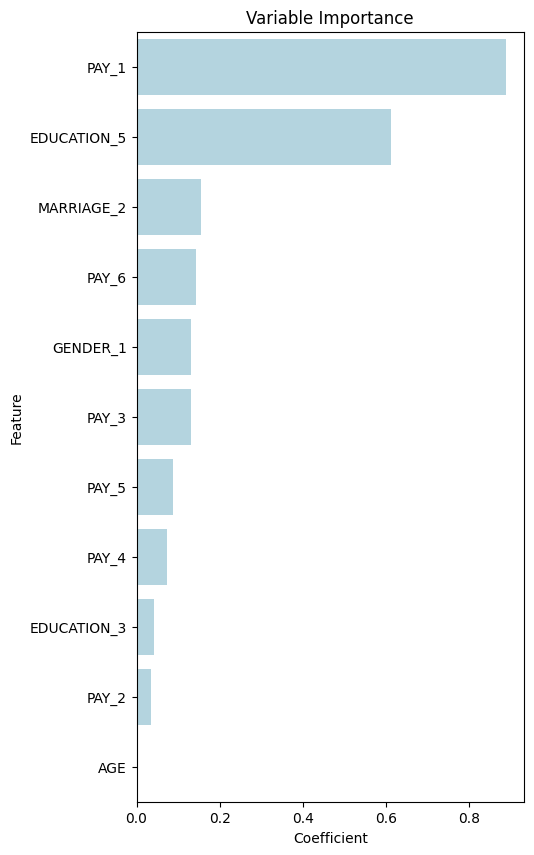

-- rejected --
 BILL_AMT3
 BILL_AMT2
 BILL_AMT1
 LIMIT_BAL
 BILL_AMT4
 BILL_AMT5
 BILL_AMT6
 PAY_AMT1
 PAY_AMT5
 PAY_AMT4
 PAY_AMT3
 PAY_AMT2
 EDUCATION_4
 EDUCATION_2
 PAY_AMT6
 MARRIAGE_3


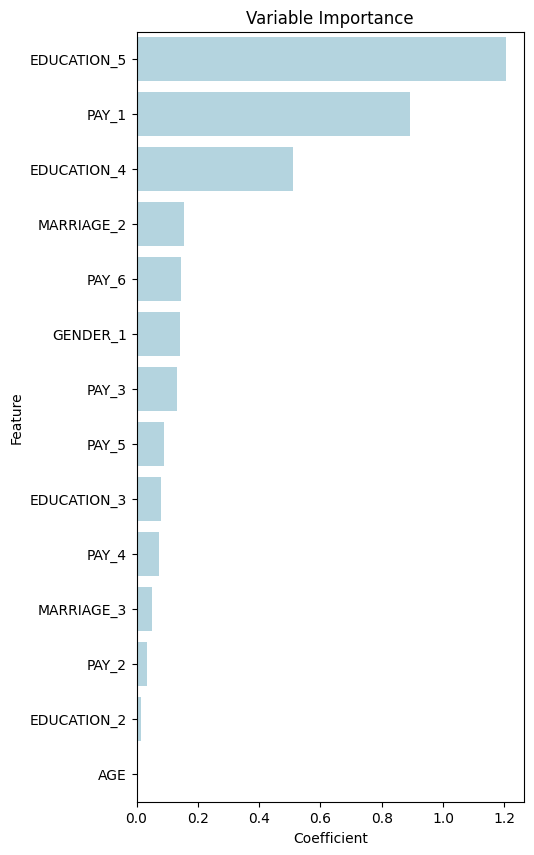

-- rejected --
 LIMIT_BAL
 BILL_AMT3
 BILL_AMT2
 BILL_AMT1
 BILL_AMT4
 PAY_AMT5
 PAY_AMT4
 PAY_AMT3
 PAY_AMT2
 PAY_AMT1
 BILL_AMT6
 BILL_AMT5
 PAY_AMT6


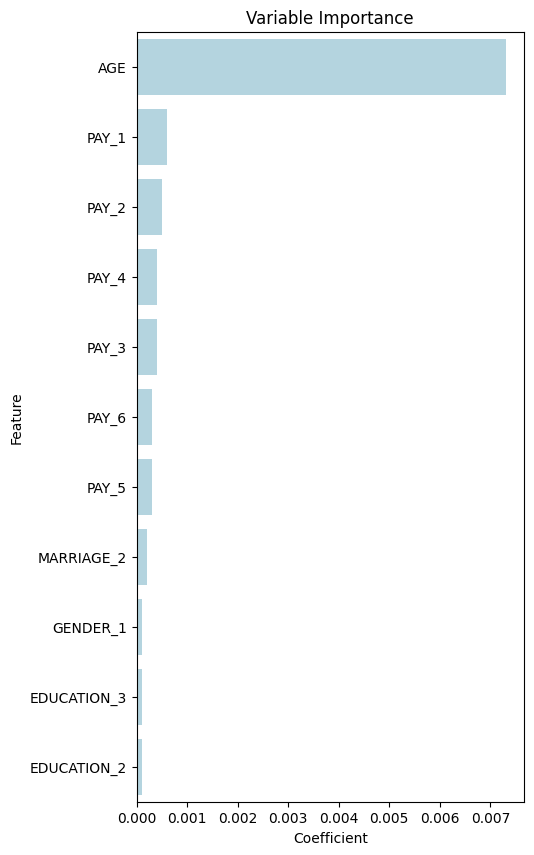

-- rejected --
 BILL_AMT3
 BILL_AMT2
 BILL_AMT1
 LIMIT_BAL
 BILL_AMT4
 BILL_AMT5
 BILL_AMT6
 PAY_AMT1
 PAY_AMT5
 PAY_AMT4
 PAY_AMT3
 PAY_AMT2
 EDUCATION_4
 PAY_AMT6
 EDUCATION_5
 MARRIAGE_3


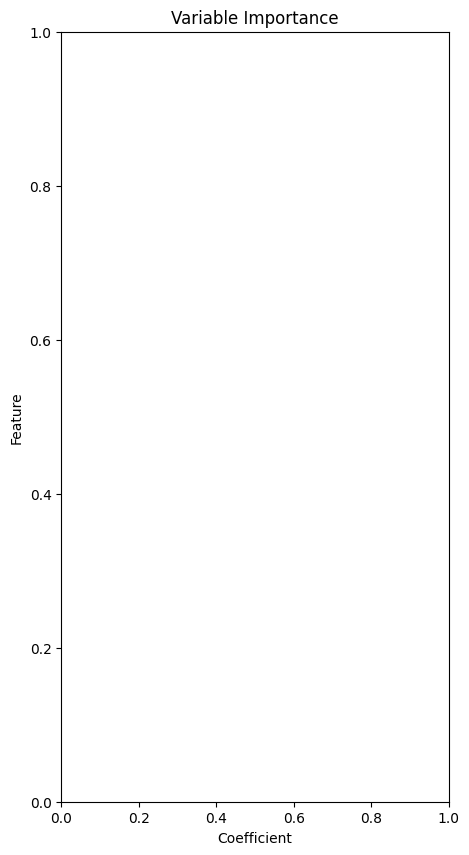

-- rejected --
 LIMIT_BAL
 AGE
 PAY_1
 PAY_2
 PAY_3
 PAY_4
 PAY_5
 PAY_6
 BILL_AMT1
 BILL_AMT2
 BILL_AMT3
 BILL_AMT4
 BILL_AMT5
 BILL_AMT6
 PAY_AMT1
 PAY_AMT2
 PAY_AMT3
 PAY_AMT4
 PAY_AMT5
 PAY_AMT6
 EDUCATION_2
 EDUCATION_3
 EDUCATION_4
 EDUCATION_5
 MARRIAGE_2
 MARRIAGE_3
 GENDER_1


In [469]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

# Make Predictions on the training and testing data for each model

In [470]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)

## Calculate Accuracy, Precision, Recall for each model on training and test set


L1 with c=0.1

In [471]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.8211
Precision: 0.6942
Recall.  : 0.3379
AUC      : 0.7626

 -- test set -- 
Accuracy : 0.8143
Precision: 0.6750
Recall.  : 0.3242
AUC      : 0.7587


L1 with c=0.01

In [472]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.8210
Precision: 0.6937
Recall.  : 0.3381
AUC      : 0.7630

 -- test set -- 
Accuracy : 0.8146
Precision: 0.6760
Recall.  : 0.3257
AUC      : 0.7591


L2 regularization

In [473]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.7794
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6578

 -- test set -- 
Accuracy : 0.7765
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6456


Elastic Net

In [474]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.7793
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6577

 -- test set -- 
Accuracy : 0.7768
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6471
